In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import torch
from edl_playground.edl.distribution import plot_model_uncertainty_distribution

In [2]:
def show_training(history):
    """
    Show loss and accuracies during training.

    Parameters:
        - history (dict):
            - loss (list[float]): Training losses.
            - train_acc (list[float]): Training accuracies.
            - val_acc (list[float]): Validation accuracies.

    """
    fig, ax = plt.subplots(figsize=(7, 6))
    fig.suptitle('Training - Accuracy')

    # Set subplot titles.
    # ax.set_title('Accuracy')

    # Set subplot axis labels.
    ax.set_xlabel('Epoch'), ax.set_ylabel('Accuracy')

    # Plot loss and accuracies.
    ax.plot(history['train_accuracy'], label='Train')
    ax.plot(history['val_accuracy'], label='Val')
    ax.legend()

    plt.show()

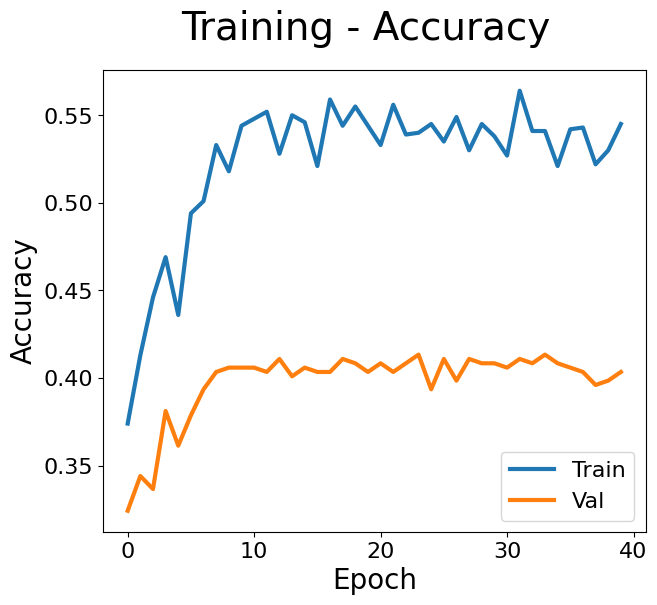

In [3]:
with open("results/mobilenet_small_last_layer_train_results.json") as f:
    results = json.load(f)

with plt.rc_context({
    "figure.titlesize": 28,
    "axes.titlesize": 24,
    "axes.labelsize": 20,
    "lines.linewidth": 3,
    "lines.markersize": 10,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
}):
    show_training(results)

In [4]:
with open("results/mobilenet_small_last_layer_test_results.json") as f:
    results = json.load(f)
results["accuracy"]

0.31925466656684875

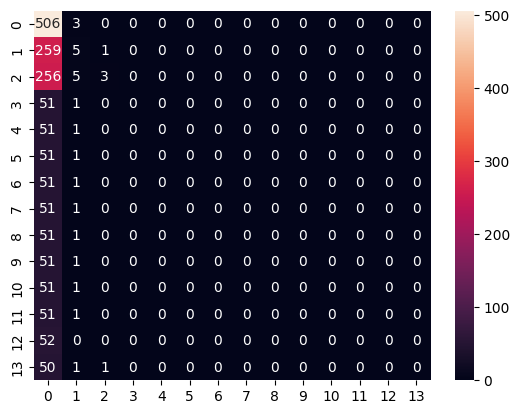

In [5]:
confusion_matrix = results["confusion_matrix"]

df_cm = pd.DataFrame(confusion_matrix)
sn.heatmap(df_cm, annot=True, fmt="g")
plt.show()

In [6]:
def show_edl_training(history):
    """
    Show loss and accuracies during training.

    Parameters:
        - history (dict):
            - loss (list[float]): Training losses.
            - train_acc (list[float]): Training accuracies.
            - val_acc (list[float]): Validation accuracies.

    """
    fig, ax = plt.subplots(figsize=(7, 6))
    fig.suptitle('Training - AccU')

    # Set subplot axis labels.
    ax.set_xlabel('Epoch'), ax.set_ylabel('AccU')

    # Plot loss and accuracies.
    ax.plot(history['train_accuracy_considering_uncertainty'], label='Train')
    ax.plot(history['val_accuracy_considering_uncertainty'], label='Val')
    ax.legend()

    plt.show()

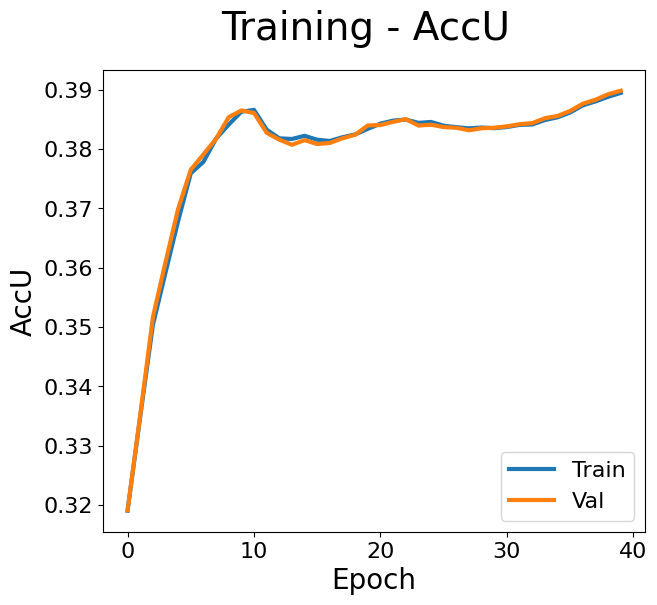

In [7]:
with open("results/mobilenet_edl_thresh_1_train_results.json") as f:
    results = json.load(f)

with plt.rc_context({
    "figure.titlesize": 28,
    "axes.titlesize": 24,
    "axes.labelsize": 20,
    "lines.linewidth": 3,
    "lines.markersize": 10,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
}):
    show_edl_training(results)

In [8]:
def show_edl_training(history):

    for metric in ["AccU", "AvU", "SRC"]:
        fig, ax = plt.subplots(figsize=(7, 6))
        fig.suptitle(f'Training - {metric}')

        # Set subplot titles.
        # ax.set_title('Accuracy')

        # Set subplot axis labels.
        ax.set_xlabel('Epoch'), ax.set_ylabel(f'{metric}')

        # Plot loss and accuracies.
        ax.plot(history[f'Train_{metric}'], label='Train')
        ax.plot(history[f'Train_{metric}'], label='Val')
        ax.legend()


    plt.show()

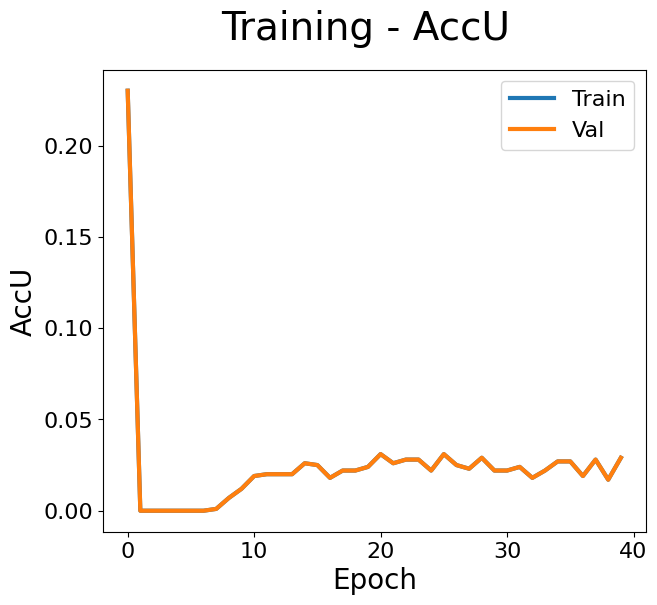

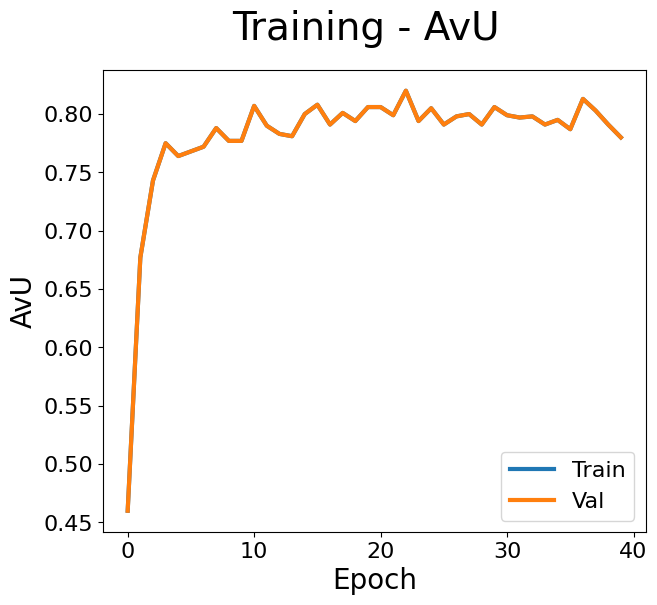

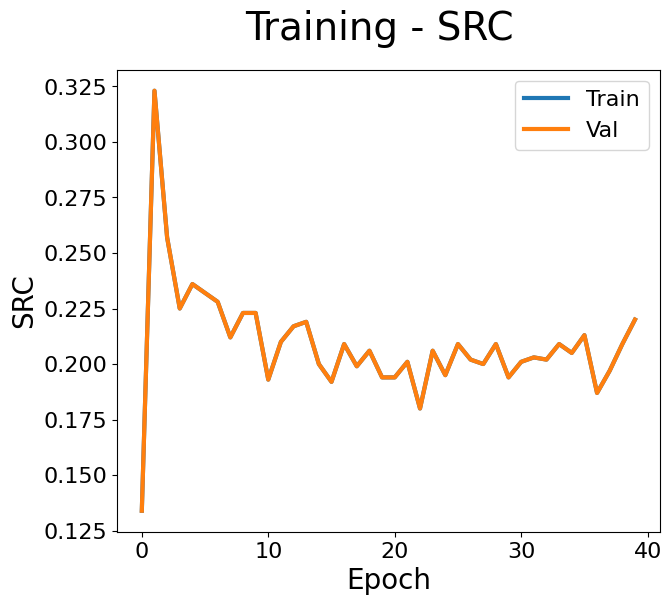

In [9]:
with open("results/mobilenet_edl_thresh_train_results.json") as f:
    results = json.load(f)

with plt.rc_context({
    "figure.titlesize": 28,
    "axes.titlesize": 24,
    "axes.labelsize": 20,
    "lines.linewidth": 3,
    "lines.markersize": 10,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
}):
    show_edl_training(results)

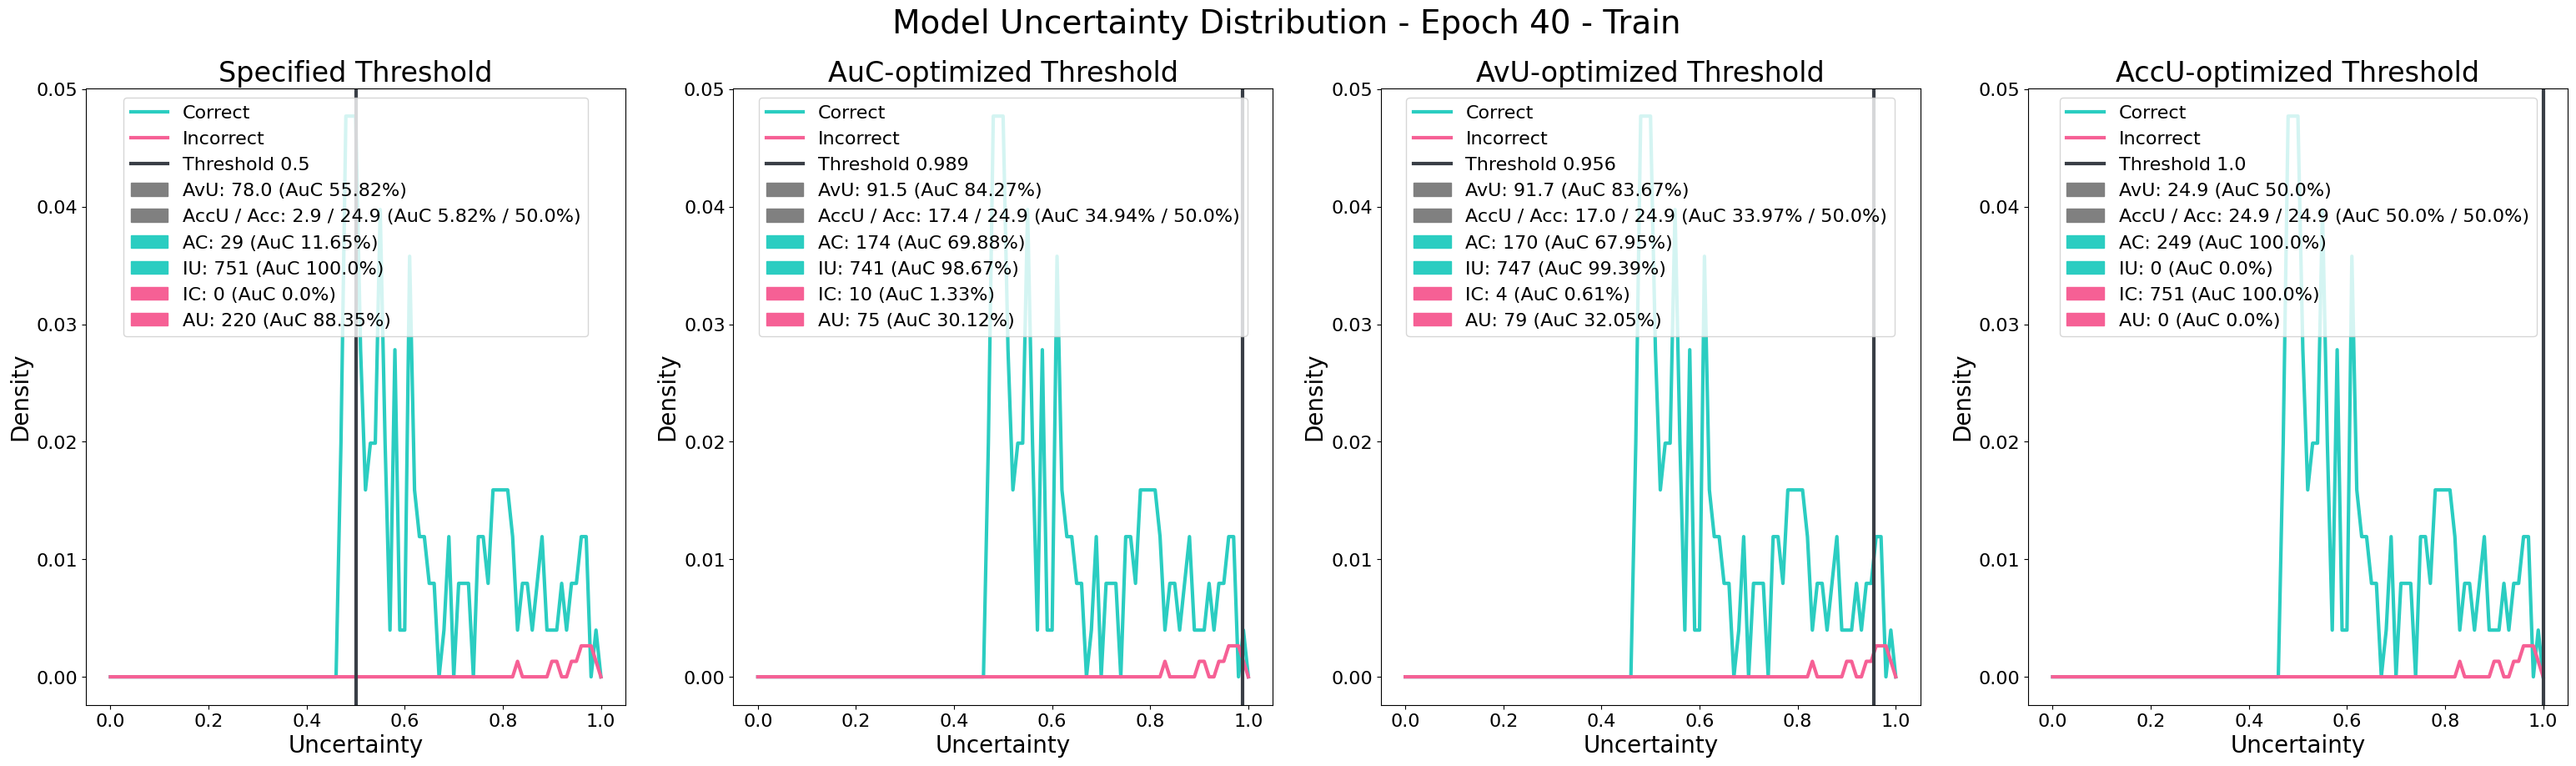

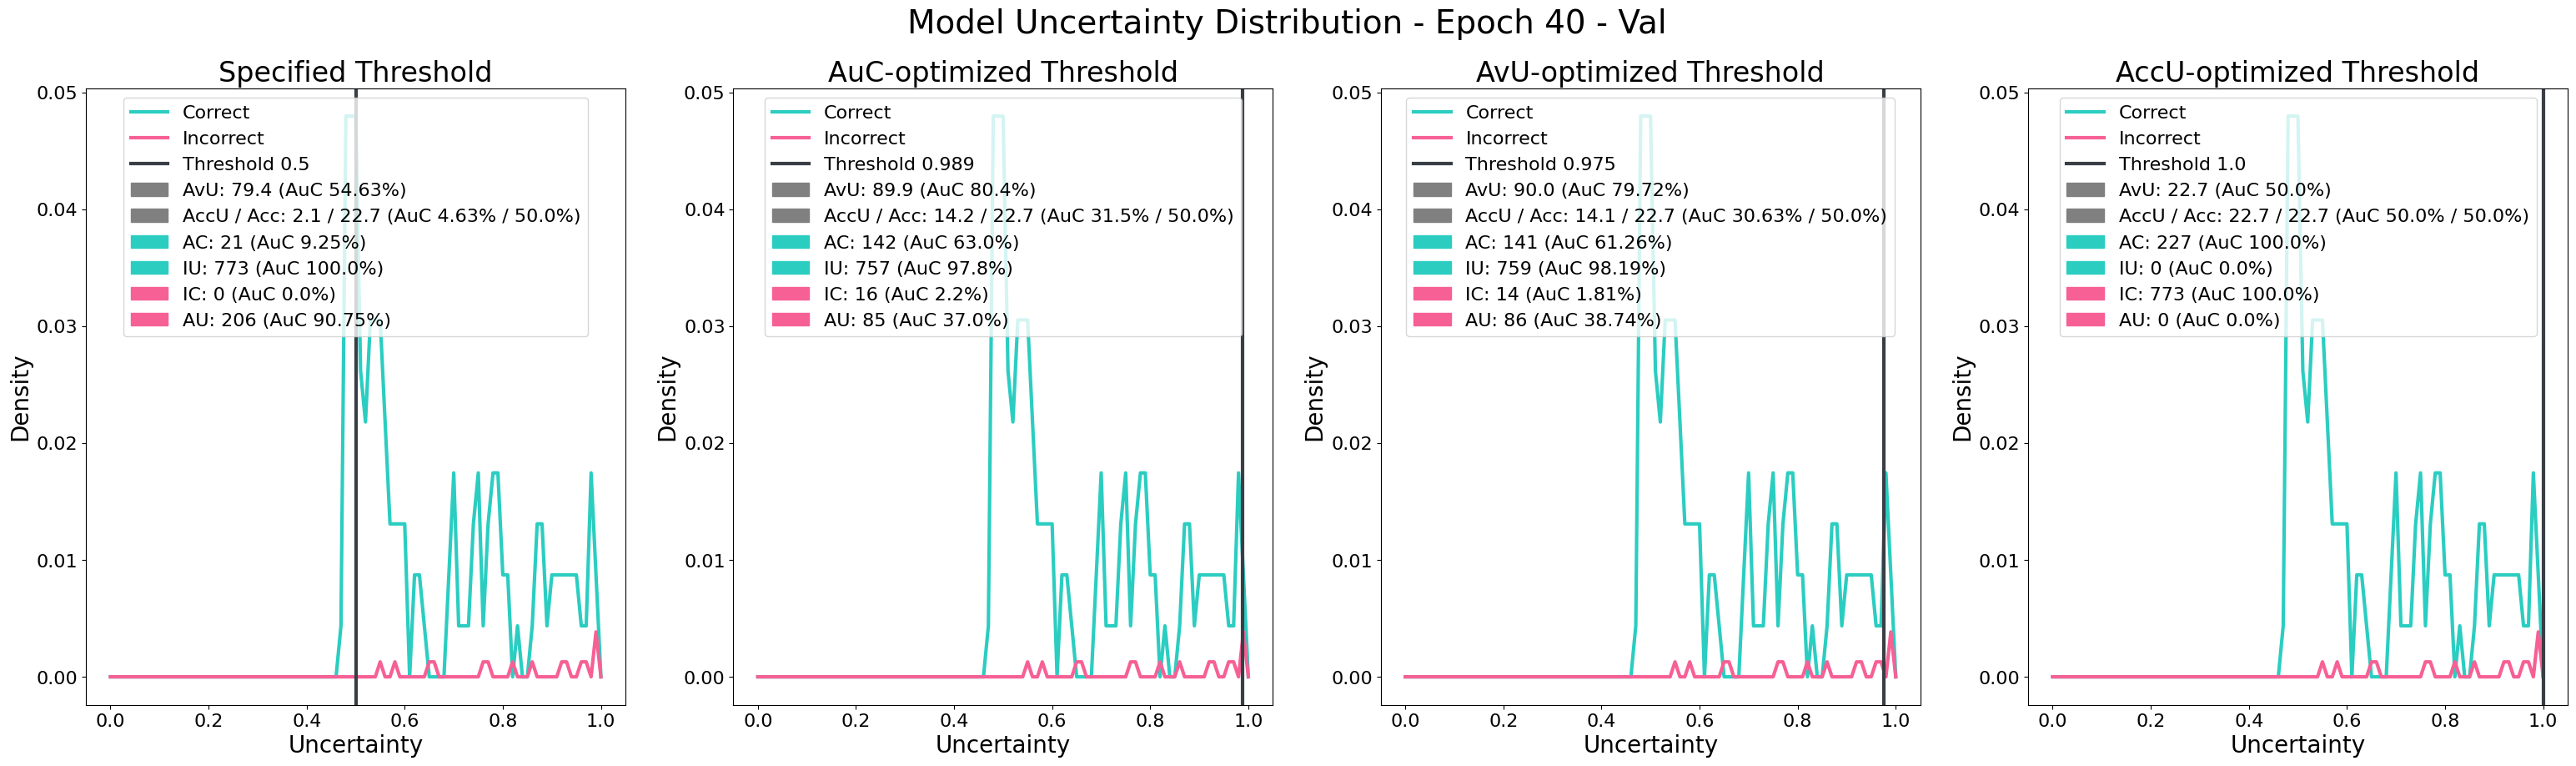

In [10]:
uncertainty_thresh = 0.5

with plt.rc_context({
    "figure.titlesize": 28,
    "axes.titlesize": 24,
    "axes.labelsize": 20,
    "lines.linewidth": 3,
    "lines.markersize": 10,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
}):
    epoch = len(results[f"Train_correct"])-1
    for phase in ["Train", "Val"]:
        correct = results[f"{phase}_correct"][epoch]
        incorrect = results[f"{phase}_incorrect"][epoch]
        fig, axs = plot_model_uncertainty_distribution(torch.tensor(correct), torch.tensor(incorrect), uncertainty_thresh, density=True, figsize=(8*4*1.2, 8*1.2))
        fig.suptitle(f"{fig._suptitle.get_text()} - Epoch {epoch+1} - {phase}")

plt.show()

In [11]:
with open("results/mobilenet_edl_thresh_test_results.json") as f:
    results = json.load(f)

for metric in ["AccU", "AvU", "SRC"]:
    print(f"{metric}:", results[metric])

AccU: 0.011801242236024845
AvU: 0.6956521739130435
SRC: 0.30434782608695654
